In [7]:
import matplotlib.pyplot as plt

from simphony.libraries import siepic
from simphony.die import Die

In [8]:
wg_input = siepic.Waveguide(100e-6, name="wg_input")
wg_out1 = siepic.Waveguide(100e-6, name="wg_out1")
wg_connect1 = siepic.Waveguide(100e-6, name="wg_connect1")
wg_out2 = siepic.Waveguide(100e-6, name="wg_out2")
wg_connect2 = siepic.Waveguide(100e-6, name="wg_connect2")
wg_out3 = siepic.Waveguide(100e-6, name="wg_out3")
terminator = siepic.Terminator(name="terminator")

# ring1 = ring_factory(10e-6)
# ring1.circuit.to_subcircuit().name = "ring1"
# ring2 = ring_factory(11e-6)
# ring2.circuit.to_subcircuit().name = "ring2"
# ring3 = ring_factory(12e-6)
# ring3.circuit.to_subcircuit().name = "ring3"

ring1 = siepic.HalfRing(width=500e-9, thickness=220e-9, radius=10e-6, gap=100e-9, name="ring1")
halfring1 = siepic.HalfRing(width=500e-9, thickness=220e-9, radius=10e-6, gap=100e-9, name="halfring1")
terminator1 = siepic.Terminator(name="terminator1")

ring1.rename_pins("pass", "midt", "midb", "in")
halfring1.rename_pins("out", "midb", "midt", "term")

# the interface method will connect all of the pins with matching names
# between the two components together
# ring1.interface(halfring1)
# halfring1["term"].connect(terminator)

ring2 = siepic.HalfRing(width=500e-9, thickness=220e-9, radius=11e-6, gap=100e-9, name="ring2")
halfring2 = siepic.HalfRing(width=500e-9, thickness=220e-9, radius=11e-6, gap=100e-9, name="halfring2")
terminator2 = siepic.Terminator(name="terminator2")

ring2.rename_pins("pass", "midb", "midt", "in")
halfring2.rename_pins("out", "midt", "midb", "term")


# the interface method will connect all of the pins with matching names
# between the two components together
# ring2.interface(halfring2)
# halfring2["term"].connect(terminator)

ring3 = siepic.HalfRing(width=500e-9, thickness=220e-9, radius=12e-6, gap=100e-9, name="ring3")
halfring3 = siepic.HalfRing(width=500e-9, thickness=220e-9, radius=12e-6, gap=100e-9, name="halfring3")
terminator3 = siepic.Terminator(name="terminator3")

ring3.rename_pins("pass", "midb", "midt", "in")
halfring3.rename_pins("out", "midt", "midb", "term")

# the interface method will connect all of the pins with matching names
# between the two components together
# ring3.interface(halfring3)
# halfring3["term"].connect(terminator)

# die = Die(name="die")

# # die.add_components([ring1, halfring1, terminator1, ring2, halfring2, terminator2, ring3, halfring3, terminator3, terminator, wg_input, wg_out1, wg_connect1, wg_out2, wg_connect2, wg_out3])
# die.add_components([ring1,     ring2,     ring3,     terminator,  wg_input,    wg_connect1, wg_connect2, wg_out1,
#                     halfring1, halfring2, halfring3, terminator1, terminator2, terminator3, wg_out2,     wg_out3])

In [ ]:
die.distribute_devices(direction='x', spacing=10)
die.visualize(show_ports=False)

In [ ]:
ring1.interface(halfring1)
halfring1["term"].connect(terminator1)
# # ring1 = ring1.circuit.to_subcircuit()

# ring2.interface(halfring2)
# halfring2["term"].connect(terminator2)
# # ring2 = ring2.circuit.to_subcircuit()

# ring3.interface(halfring3)
# halfring3["term"].connect(terminator3)
# # ring3 = ring3.circuit.to_subcircuit()

die.visualize(show_ports=False)

In [ ]:
die.move(ring2, halfring2, terminator2, distance=(0, -1.5))
die.move(ring3, halfring3, terminator3, distance=(0, -3))

In [ ]:
ring1["in"].connect(wg_input["pin1"])
ring1["pass"].connect(wg_connect1["pin1"])
halfring1["out"].connect(wg_out1["pin1"])

ring2["in"].connect(wg_connect1["pin2"])
ring2["pass"].connect(wg_connect2["pin1"])
halfring2["out"].connect(wg_out2["pin1"])

ring3["in"].connect(wg_connect2["pin2"])
ring3["pass"].connect(wg_out3["pin1"])
halfring3["out"].connect(terminator)

In [ ]:
die.visualize(show_ports=True)

In [9]:
die2 = Die(name="die")
# die2.add_components([ring1, halfring1])
die2.add_components([ring1,     ring2,     ring3,     terminator,  wg_input,    wg_connect1, wg_connect2, wg_out1,
                     halfring1, halfring2, halfring3, terminator1, terminator2, terminator3, wg_out2,     wg_out3])
die2.distribute_devices('grid', shape=(8,2), spacing=(10,5))

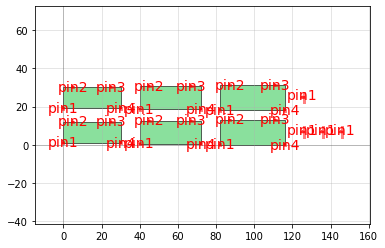

In [10]:
die2.visualize()

In [11]:
ring1.interface(halfring1)
ring2.interface(halfring2)
ring3.interface(halfring3)


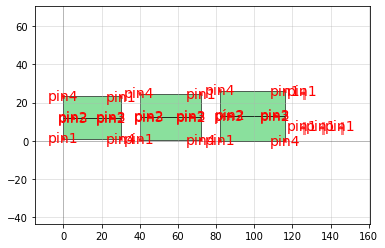

In [12]:
die2.visualize()